# Video Processing Techniques

# Video Recording

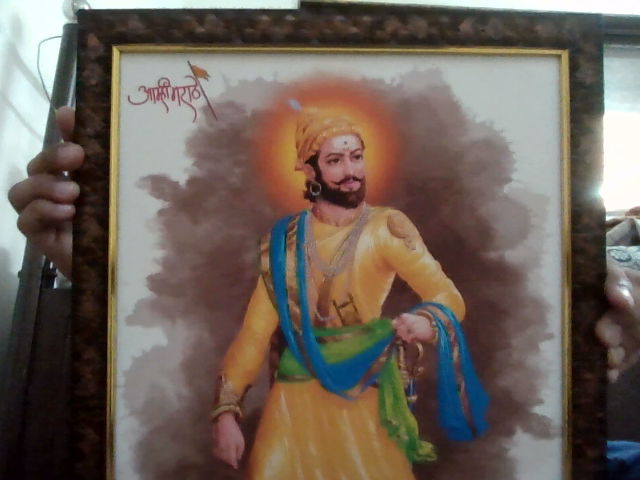

Webcam stopped after 10 seconds. Video saved as 'output.avi'.


In [8]:
import cv2
import time
import IPython.display as display
from PIL import Image

# Open webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open the video camera.")
    exit()

# Set up video writer
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))

start_time = time.time()
duration = 10  # Capture for 10 seconds

try:
    while time.time() - start_time < duration:
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture frame.")
            break

        out.write(frame)  # Save frame to video file

        # Convert BGR to RGB for Jupyter display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(frame_rgb)

        display.clear_output(wait=True)  # Clear previous frame
        display.display(img)  # Show current frame in Jupyter

        time.sleep(0.05)  # Slight delay for smooth display

except KeyboardInterrupt:
    print("Webcam stream manually stopped.")

cap.release()
out.release()

print("Webcam stopped after 10 seconds. Video saved as 'output.avi'.")

# Video Stacking 

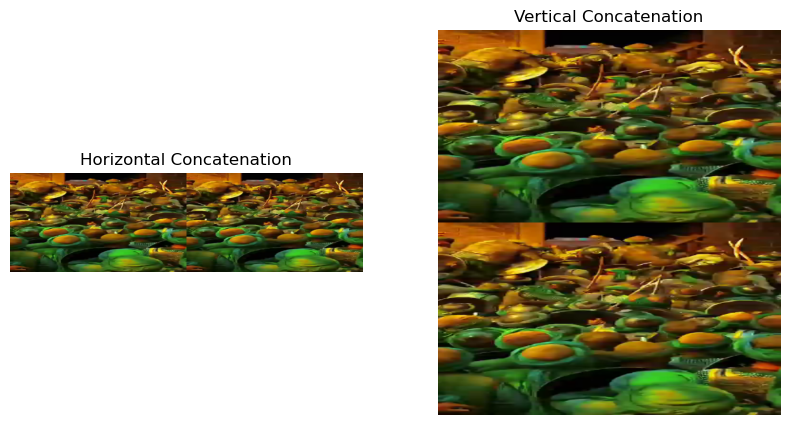

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

video_path = r"D:\Niraj Khankari\Internship AI-Enhanced-Engagement-Tracker-for-Young-Learners\videos\Chhaava (Chhtrapati Maharaj Sambhaji Raje Bhosale).mp4"

cap1 = cv2.VideoCapture(video_path)
cap2 = cv2.VideoCapture(video_path)

if not cap1.isOpened() or not cap2.isOpened():
    print("Error: Could not open video.")
    cap1.release()
    cap2.release()
    exit()

while True:
    ret1, frame1 = cap1.read()
    ret2, frame2 = cap2.read()

    if not ret1 or not ret2:
        break

    frame1 = cv2.resize(frame1, (640, 360))
    frame2 = cv2.resize(frame2, (640, 360))

    h_concat = np.hstack((frame1, frame2))
    v_concat = np.vstack((frame1, frame2))

    # Convert BGR to RGB (Matplotlib uses RGB format)
    h_concat_rgb = cv2.cvtColor(h_concat, cv2.COLOR_BGR2RGB)
    v_concat_rgb = cv2.cvtColor(v_concat, cv2.COLOR_BGR2RGB)

    # Display the frames using Matplotlib
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(h_concat_rgb)
    plt.title("Horizontal Concatenation")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(v_concat_rgb)
    plt.title("Vertical Concatenation")
    plt.axis("off")

    plt.show()

    break  # Remove this line if you want to process the whole video frame by frame

cap1.release()
cap2.release()


# Video FPS Calculator

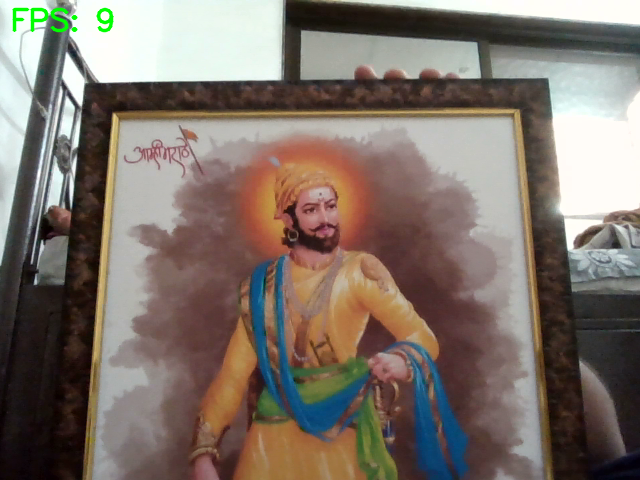

FPS: 9
Webcam stopped after 10 seconds. Video saved as 'output.avi'.


In [14]:
import cv2
import time
import IPython.display as display
from PIL import Image

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open the video camera.")
    exit()

# Video writer setup
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))

prev_frame_time = 0
new_frame_time = 0

start_time = time.time()
duration = 10  # Capture for 10 seconds

try:
    while time.time() - start_time < duration:
        new_frame_time = time.time()

        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture frame.")
            break

        out.write(frame)

        fps = 1 / (new_frame_time - prev_frame_time)
        prev_frame_time = new_frame_time

        cv2.putText(frame, f"FPS: {int(fps)}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 
                    1, (0, 255, 0), 2, cv2.LINE_AA)

        # Convert BGR to RGB for Jupyter display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(frame_rgb)

        display.clear_output(wait=True)  
        display.display(img)  

        print(f"FPS: {int(fps)}")

        time.sleep(0.05)

except KeyboardInterrupt:
    print("Webcam stream manually stopped.")

cap.release()
out.release()

print("Webcam stopped after 10 seconds. Video saved as 'output.avi'.")


# Multi Video Stream 

blurred_videos is not a video file
Playing Chhaava (Chhtrapati Maharaj Sambhaji Raje Bhosale).mp4...


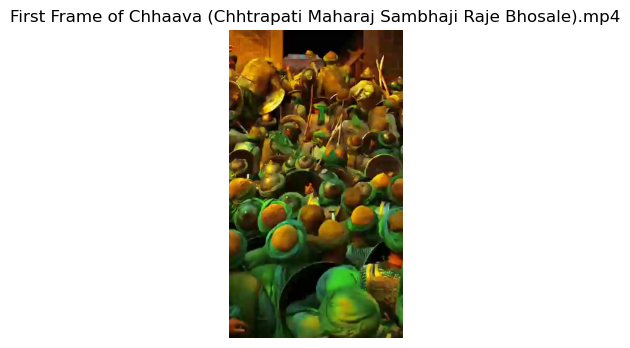

Playing RAM.mp4...


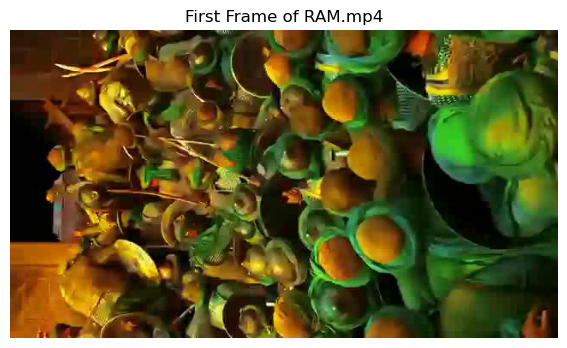

In [17]:
import cv2
import os
import matplotlib.pyplot as plt

folder_path = r"D:\Niraj Khankari\Internship AI-Enhanced-Engagement-Tracker-for-Young-Learners\videos"  # Change to the correct folder

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    
    # Check if the file is a video
    if filename.lower().endswith(('.mp4', '.avi', '.mov', '.mkv')):
        cap = cv2.VideoCapture(file_path)
        
        if not cap.isOpened():
            print(f"Failed to open video {filename}")
            continue
        
        print(f"Playing {filename}...")

        # Read and display the first frame only (Modify if you want multiple frames)
        ret, frame = cap.read()
        if ret:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib
            plt.figure(figsize=(8, 4))
            plt.imshow(frame_rgb)
            plt.title(f"First Frame of {filename}")
            plt.axis("off")
            plt.show()

        cap.release()  # Release video capture object
    else:
        print(f"{filename} is not a video file")


# Video Stream

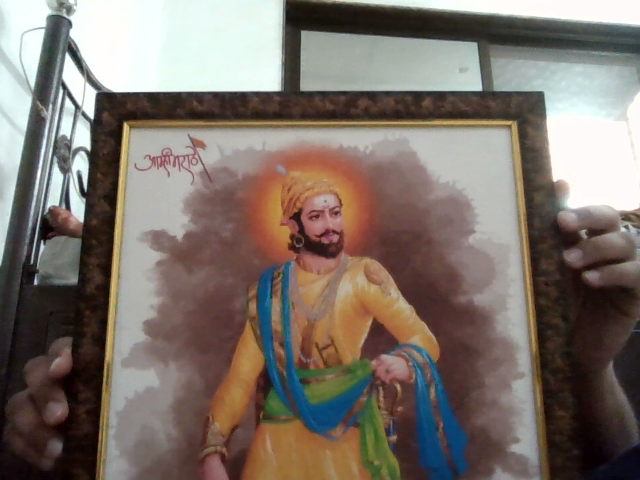

Webcam automatically stopped after 10 seconds.


In [20]:
import cv2
import IPython.display as display
from PIL import Image
import time

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open the video camera.")
    cap.release()
    exit()

start_time = time.time()  # Record start time
duration = 10  # Stop after 10 seconds

try:
    while time.time() - start_time < duration:  # Run for 10 seconds
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture frame.")
            break

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(frame_rgb)

        display.clear_output(wait=True)
        display.display(img)

        time.sleep(0.05)

except KeyboardInterrupt:
    print("Webcam stream stopped.")

cap.release()
print("Webcam automatically stopped after 10 seconds.")


# Blur Video

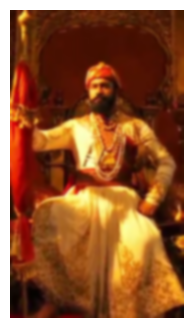

In [23]:
import cv2
import matplotlib.pyplot as plt
import IPython.display as display

# Video file path
video_path = r"D:\Niraj Khankari\Internship AI-Enhanced-Engagement-Tracker-for-Young-Learners\videos\Chhaava (Chhtrapati Maharaj Sambhaji Raje Bhosale).mp4"

# Open video
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Couldn't open video.")
else:
    print(f"Displaying blurred video: {video_path}")

    # Read and display frames one by one
    while True:
        ret, frame = cap.read()
        if not ret:
            break  # End of video
        
        # Apply Gaussian Blur
        blurred_frame = cv2.GaussianBlur(frame, (15, 15), 0)  # Adjust kernel size for blur intensity

        # Convert BGR to RGB (for Matplotlib)
        frame_rgb = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2RGB)

        # Display blurred frame in Jupyter Notebook
        plt.figure(figsize=(6, 4))
        plt.imshow(frame_rgb)
        plt.axis("off")
        plt.show()

        # Pause for a short time to simulate video playback
        display.clear_output(wait=True)

    cap.release()


# Cropping Video

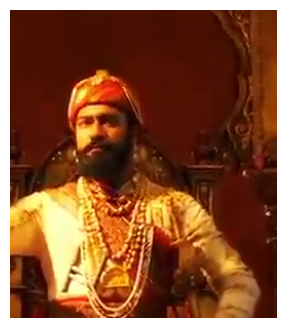

In [26]:
import cv2
import matplotlib.pyplot as plt
import IPython.display as display

# Video file path
video_path = r"D:\Niraj Khankari\Internship AI-Enhanced-Engagement-Tracker-for-Young-Learners\videos\Chhaava (Chhtrapati Maharaj Sambhaji Raje Bhosale).mp4"

# Define cropping region (x, y, width, height) - Adjust as needed
crop_x, crop_y, crop_width, crop_height = 100, 50, 300, 300  

# Open video
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Couldn't open video.")
else:
    print(f"Displaying cropped video: {video_path}")

    # Read and display frames one by one
    while True:
        ret, frame = cap.read()
        if not ret:
            break  # End of video
        
        # Crop the frame
        cropped_frame = frame[crop_y:crop_y+crop_height, crop_x:crop_x+crop_width]

        # Convert BGR to RGB (for Matplotlib)
        frame_rgb = cv2.cvtColor(cropped_frame, cv2.COLOR_BGR2RGB)

        # Display cropped frame in Jupyter Notebook
        plt.figure(figsize=(6, 4))
        plt.imshow(frame_rgb)
        plt.axis("off")
        plt.show()

        # Pause for a short time to simulate video playback
        display.clear_output(wait=True)

    cap.release()


# Edge Detection Video

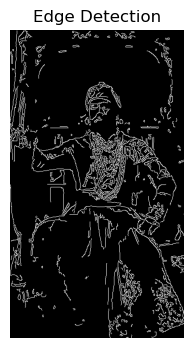

In [29]:
import cv2
import matplotlib.pyplot as plt
import IPython.display as display

# Video file path
video_path = r"D:\Niraj Khankari\Internship AI-Enhanced-Engagement-Tracker-for-Young-Learners\videos\Chhaava (Chhtrapati Maharaj Sambhaji Raje Bhosale).mp4"

# Open video capture
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Couldn't open video.")
else:
    print(f"Displaying edge-detected video: {video_path}")

    # Process and display each frame
    while True:
        ret, frame = cap.read()
        if not ret:
            break  # End of video

        # Convert frame to grayscale (Canny requires a single channel image)
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Apply Canny edge detection
        edges = cv2.Canny(gray_frame, 100, 200)  # Adjust thresholds if needed

        # Display the edge-detected frame using matplotlib
        plt.figure(figsize=(6, 4))
        plt.imshow(edges, cmap='gray')
        plt.title("Edge Detection")
        plt.axis("off")
        plt.show()

        # Pause for a short time to simulate video playback
        display.clear_output(wait=True)

    cap.release()


# HSV Video

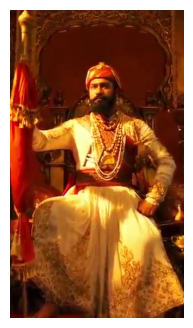

In [32]:
import cv2
import matplotlib.pyplot as plt
import IPython.display as display

# Video file path
video_path = r"D:\Niraj Khankari\Internship AI-Enhanced-Engagement-Tracker-for-Young-Learners\videos\Chhaava (Chhtrapati Maharaj Sambhaji Raje Bhosale).mp4"

# Open video
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Couldn't open video.")
else:
    print(f"Displaying HSV video: {video_path}")

    # Read and display frames one by one
    while True:
        ret, frame = cap.read()
        if not ret:
            break  # End of video
        
        # Convert BGR to HSV
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Convert HSV to RGB for displaying with Matplotlib
        frame_rgb = cv2.cvtColor(hsv_frame, cv2.COLOR_HSV2RGB)

        # Display HSV frame in Jupyter Notebook
        plt.figure(figsize=(6, 4))
        plt.imshow(frame_rgb)
        plt.axis("off")
        plt.show()

        # Pause for a short time to simulate video playback
        display.clear_output(wait=True)

    cap.release()


# Video Dilation & Erosion

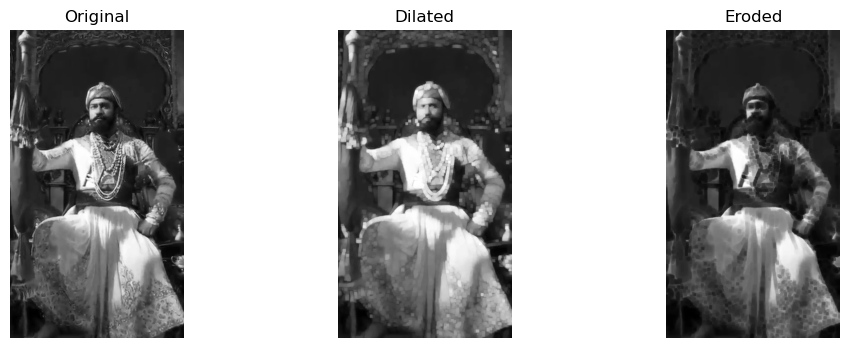

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

# Video file path
video_path = r"D:\Niraj Khankari\Internship AI-Enhanced-Engagement-Tracker-for-Young-Learners\videos\Chhaava (Chhtrapati Maharaj Sambhaji Raje Bhosale).mp4"

# Open video
cap = cv2.VideoCapture(video_path)

# Define kernel for dilation & erosion
kernel = np.ones((5, 5), np.uint8)  # Adjust kernel size as needed

if not cap.isOpened():
    print("Error: Couldn't open video.")
else:
    print(f"Displaying Dilation & Erosion video: {video_path}")

    # Read and display frames one by one
    while True:
        ret, frame = cap.read()
        if not ret:
            break  # End of video
        
        # Convert frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Apply Dilation
        dilated_frame = cv2.dilate(gray_frame, kernel, iterations=1)
        
        # Apply Erosion
        eroded_frame = cv2.erode(gray_frame, kernel, iterations=1)

        # Display original, dilated, and eroded frames in Jupyter Notebook
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.imshow(gray_frame, cmap='gray')
        plt.title("Original")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(dilated_frame, cmap='gray')
        plt.title("Dilated")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(eroded_frame, cmap='gray')
        plt.title("Eroded")
        plt.axis("off")

        plt.show()

        # Pause for a short time to simulate video playback
        display.clear_output(wait=True)

    cap.release()


# Displaying & Detecting Contours

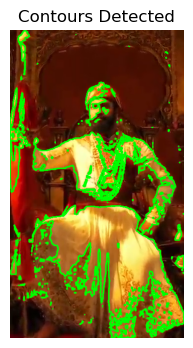

In [39]:
import cv2
import matplotlib.pyplot as plt
import IPython.display as display

# Video file path
video_path = r"D:\Niraj Khankari\Internship AI-Enhanced-Engagement-Tracker-for-Young-Learners\videos\Chhaava (Chhtrapati Maharaj Sambhaji Raje Bhosale).mp4"

# Open video
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Couldn't open video.")
else:
    print(f"Displaying contour-detected video: {video_path}")

    # Read and process frames one by one
    while True:
        ret, frame = cap.read()
        if not ret:
            break  # End of video
        
        # Convert frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Apply threshold to create a binary image
        _, thresh = cv2.threshold(gray_frame, 100, 255, cv2.THRESH_BINARY)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # Draw contours on the original frame
        contoured_frame = frame.copy()
        cv2.drawContours(contoured_frame, contours, -1, (0, 255, 0), 2)  # Green contours

        # Convert BGR to RGB for Matplotlib display
        frame_rgb = cv2.cvtColor(contoured_frame, cv2.COLOR_BGR2RGB)

        # Display contoured frame in Jupyter Notebook
        plt.figure(figsize=(6, 4))
        plt.imshow(frame_rgb)
        plt.axis("off")
        plt.title("Contours Detected")
        plt.show()

        # Pause for a short time to simulate video playback
        display.clear_output(wait=True)

    cap.release()


# Rotating Video

In [44]:
import cv2
import IPython.display as display
import time

# Input video path
video_path = r"D:\Niraj Khankari\Internship AI-Enhanced-Engagement-Tracker-for-Young-Learners\videos\Chhaava (Chhtrapati Maharaj Sambhaji Raje Bhosale).mp4"

# Open the video
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Couldn't open video.")
else:
    print(f"Displaying rotated video: {video_path}")

    while True:
        ret, frame = cap.read()
        if not ret:
            break  # End of video
        
        # Rotate frame 90 degrees counterclockwise
        rotated_frame = cv2.rotate(frame, cv2.ROTATE_90_COUNTERCLOCKWISE)

        # Display the rotated frame
        _, encoded_frame = cv2.imencode('.jpg', rotated_frame)
        display.clear_output(wait=True)
        display.display(display.Image(data=encoded_frame.tobytes()))
        time.sleep(0.03)  # Adjust for frame rate

    cap.release()
    display.clear_output()
    print("Video playback finished.")


Video playback finished.
